In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import time

from classification.evaluation import performance_indices, roc_analysis
from classification.inputs import hparams
from classification.training import training_model, training_history
from glob import glob
from IPython.display import display, clear_output

np.set_printoptions(precision=4, suppress=True)

plt.style.use("seaborn-v0_8-paper")
plt.style.use("styles/l3_mod.mplstyle")

tf.random.set_seed(13)
np.random.seed(13)

In [2]:
data_folder = "001points"
data_path = os.path.join("data", "experimental", "classification", data_folder)

train_files = glob(os.path.join(data_path, "train_data*.csv"))
valid_files = glob(os.path.join(data_path, "valid_data*.csv"))

train_data = pd.read_csv(train_files[0])
valid_data = pd.read_csv(valid_files[0])

print(f"train: {train_data.shape}, valid: {valid_data.shape}")

train: (1111, 34), valid: (139, 34)


In [3]:
# training
results = []
for hp in hparams:
    r = training_model(train_files, valid_files, **hp)
    clear_output(wait=True)
    results.append(r)
    time.sleep(1)

  0%|          | 0/10 [00:00<?, ?it/s]

Model: Modelo #6
    Archtecture Params: {'hidden_layers': [128, 128, 128], 'activation': <function relu at 0x0000021CD6E54790>}
    Optimization Params: {'lr': 0.001, 'epochs': 500, 'batch_size': 32}

Epoch 1/500
35/35 [==============================] - 0s 3ms/step - loss: 0.8000 - categorical_accuracy: 0.7408 - val_loss: 0.5157 - val_categorical_accuracy: 0.8345 - lr: 0.0010
Epoch 2/500
35/35 [==============================] - 0s 1ms/step - loss: 0.3270 - categorical_accuracy: 0.8929 - val_loss: 0.2681 - val_categorical_accuracy: 0.8921 - lr: 0.0010
Epoch 3/500
35/35 [==============================] - 0s 1ms/step - loss: 0.2415 - categorical_accuracy: 0.9091 - val_loss: 0.2414 - val_categorical_accuracy: 0.9137 - lr: 0.0010
Epoch 4/500
35/35 [==============================] - 0s 1ms/step - loss: 0.2080 - categorical_accuracy: 0.9235 - val_loss: 0.2638 - val_categorical_accuracy: 0.8777 - lr: 0.0010
Epoch 5/500
35/35 [==============================] - 0s 1ms/step - loss: 0.1947 - cate

,model,hidden_layers,activation
0,Modelo #1,[],<function relu at 0x0000021CD6E54790>
1,Modelo #2,[32],<function relu at 0x0000021CD6E54790>
2,Modelo #3,[128],<function relu at 0x0000021CD6E54790>
3,Modelo #4,"[32, 32, 32]",<function swish at 0x0000021CD6E545E0>
4,Modelo #5,"[32, 32, 32]",<function relu at 0x0000021CD6E54790>
5,Modelo #6,"[128, 128, 128]",<function relu at 0x0000021CD6E54790>


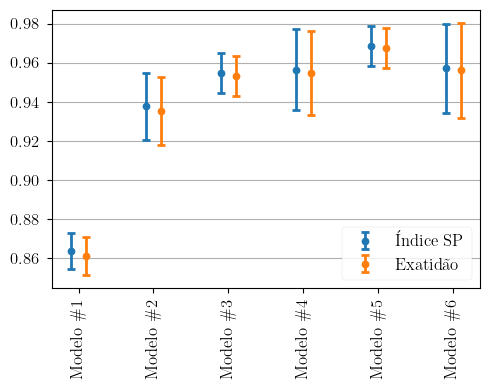

In [4]:
indices = performance_indices(results, valid_files)

accuracy = indices["accucary"]
sp_index = indices["sp_index"]

f, ax = plt.subplots(figsize=(5, 4))

labels = [hp["model_name"].replace("#", "\#") for hp in hparams]
x = np.array([i + 1 for i in np.arange(len(results))])
y = sp_index.mean(axis=0)
yerr = sp_index.std(axis=0)
ax.errorbar(
    x - 0.1,
    sp_index.mean(axis=0),
    sp_index.std(axis=0),
    fmt="o",
    elinewidth=2.0,
    capsize=3.0,
    capthick=2.0,
    label="Índice SP",
)
ax.errorbar(
    x + 0.1,
    accuracy.mean(axis=0),
    accuracy.std(axis=0),
    fmt="o",
    elinewidth=2.0,
    capsize=3.0,
    capthick=2.0,
    label="Exatidão",
)
ax.yaxis.grid()
# ax.set_ylabel("Índice Soma-Produto")
ax.set_xticks(x, labels, rotation=90, ha="center")
ax.legend()

arch_params = [hp["arch"] for hp in hparams]

df = pd.DataFrame.from_records(arch_params)
df["model"] = [hp["model_name"] for hp in hparams]
display(df[["model", "hidden_layers", "activation"]])
plt.show()

In [5]:
# training_history(results[0])

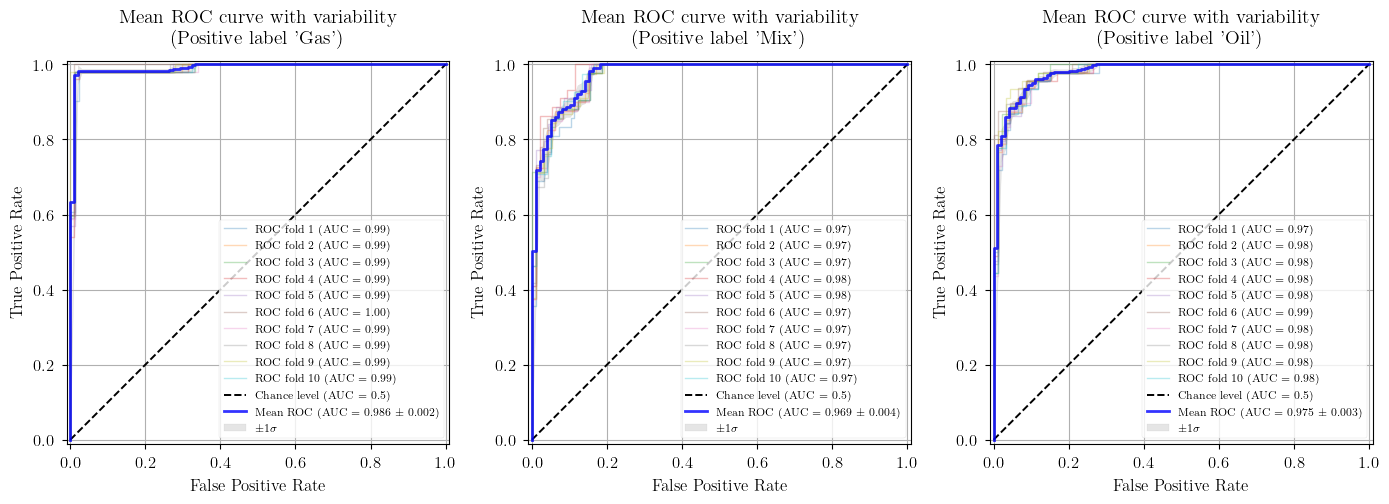

In [6]:
roc_analysis(results, valid_files, model_id=0, figsize=(14, 5))